# Task

YOUR CHRISTMAS PROJECT IS NOT THE BRIEF FOR NEXT TERM. YOUR CHRISTMAS PROJECT CAN BE FOUND IN THE WORKSHEET FOR WEEK11.

### THIS IS WHAT YOU MUST DO IN YOUR GROUPS FOR NEXT TERM:

Use your smartphones to map a space in your group in order to ‘know’ it differently. It can be any space. In order to think about knowing it differently, you need to first consider how you think it is already ‘known’ and why and how. We are thinking about the theme of power and control and we want you to particularly think about how you might explore this theme.

### What you need to do:

1. Decide on the space: why this space? What does it mean to you and the group?
2. Explore it together: how have you explored it? What are your initial thoughts and reflections? Why?
3. Decide on what you agree the dominant ways the space is controlled and perceived are. Why, what evidence?
    Decide how you will map it and why: you might need to explore some of the reading here. What new ways of knowing will this offer? Why? How?
4. Map the space
    Mapping and collating data about this space incorporates all the technical skills and issues we have touched on in this module so far. In your decisions about how and why and then in your decisions about how to best present, you can use these critical, and practical skills we have engaged with.

6.    Reflect on and critically consider your results (like with the critical listening exercise): what do you now know about this space from your findings that you didn’t know before? What can you know only from what you have created? What do we still not know?

7.    Present these stages of your project on your websites. Choose one hosting site for the team and detail these stages in a creative and critical way. How will you present your data and why?

8.    Come with a 15 minute presentation for when we return form the holidays: week beginning 22nd January. You will have a practice run of presenting as a team!

# Response: a used keyboard matt

Thinking about alternative ways of collecting and mapping data, I wanted to see what I could learn from random everyday objects. Noticing my keyboard matt had seen better days, I thought that through the wear on particular keys connections could be made in relation to language and its interfacing with computers. This isnt really using a smartphone like the breif asks, but it thought this might be an alright window between the digital and physical. Here is a picture of it:

<img width="600" style="display:inline-block;" src="img/keyboard.jpg">

### Key Use: General Observations.

* Apple British English keyboard.
* More likley to use forward arrow than backward arrow.
* Most used keys seem to be (alphabetic keys in perceived order): 
```
SPACE, BACKSPACE, SHIFT, ENTER, CMD, 
t, s, e, r, c, a, n, l, o, i, 
LEFT, UP, DOWN, RIGHT
```
* Good portion of most used functional rather than linguistic.
* As a guess: most used Alphabetic keys relate to shortcut use insted of use within language.
* `U` is the only vowel not included in the most used keys.

### Data Collection Strategy

To gain more info from the keyboard I wanted to try and quantify the key wear of each key. At high level this was done by converting key images into arrays of pixel data then summing each one to produce a score. In single 8 bit pixel data (monochromatic) each pixel can be 0-255 (black->white), as keyboard wear increasea, the amount of white does also. Therefore as reasonable an estimate; in the higher the pixel sum the more wear on the key.

To make the images I made another scan of the key-matt pictured above but from the other side so it would block out most of the key text. After this, I converted the image into a black and white threshold image with photoshop. This was to reduce the amount of dimensions needed to represent the image numerically and also to maximise the visual differences between squares by visually selecting an optimal setting for the threshold: [Edited keyboard](img/bw_keyboard.jpg).

After Using only the equally sized alphanumeric style keys I sliced and saved each key into equally sized png files, these can be found in `data/imgs/`. 

Here is `Q W E R T Y` from the keyboard.

<img style="display:inline;" src="data/imgs/q.png">
<img style="display:inline;" src="data/imgs/w.png">
<img style="display:inline;" src="data/imgs/e.png">
<img style="display:inline;" src="data/imgs/r.png">
<img style="display:inline;" src="data/imgs/t.png">
<img style="display:inline;" src="data/imgs/y.png">

for future technical reference, after doing this. a maybe better way to map the pixel data is as foreach: $\normalsize \frac{pixel-128}{128}$, this will give a better data distibution around 0 with values ranging from `-1` to `1`. addvice from some machine learning course.

In [10]:
# Import modules and functions to be used later here.
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,6)

def normalise(col):
    "min max normalisation"
    return (col - col.min()) / (col.max() - col.min())

def sorted_plot(df, **kwargs):
    "sort then plot dataframe"
    df = df.sort_values("n", ascending=True)
    df.plot(kind="barh",
            xlim=(-1,1) if (df.min(axis=1) < 0).any() else (0,1), 
            **kwargs)

### Load Data

With the new data generated we want to make some comparisons with other data sets, The main one was to see how the keyboard use compares with general english language use. Here are the data details.

* **Key Use** (data/keyscores.csv): `preprocces.py` script converted all the .png in `data/imgs/` to single CSV.
* **English Use** (data/unigrams.csv): English language letter use collected by google (original source: http://norvig.com/mayzner.html : 'Google books Ngrams raw data set, which gives word counts of the number of times each word is mentioned (broken down by year of publication) in the books that have been scanned by Google.' -> [google ngrams](http://storage.googleapis.com/books/ngrams/books/datasetsv2.html)).

In [11]:
# scores from keyboard usage.
ks = pd.read_csv("data/keyscores.csv").set_index("key")

# letter usage from a google dataset of ngrams
alpha = normalise(pd.read_csv("data/unigrams.csv").set_index("key"))

### Checking the dataset against visual observations.

I realise the data I generated isnt perfect and wont get a completely accurate measure of the amount of wear on the keys but I feel its good enough for now within this little experiment. Now the data is loaded we can have a quick check how it compares to my visual analysis. I said before the most worn alphabetic letters (in-order) were: `t, s, e, r, c, a, n, l, o, i` (see if you agree). If I get nlargest from my newly created data I get the following.

In [12]:
print(ks.nlargest(10, 'n'))

          n
key        
s    982939
e    935900
r    930848
a    917225
c    916879
t    890404
o    831948
1    795902
i    763926
n    750222


So the top 10 are exactly the same just in a slightly different order. Looking at the actual matt again and holding it to a light this order seems equally reasonable, I dont really know either way but again its good enough for now. 

### Key Use: Quantified

Without quantifing the data you can argue the most used keys are: `shift` and `⌘` (cmd), then probally `space` or `enter`. With it hopefully we can make some comparisons with how english language is used generally.

To see this i'll just plot data from key use, english use, english use - key use and a absolute value from the last.


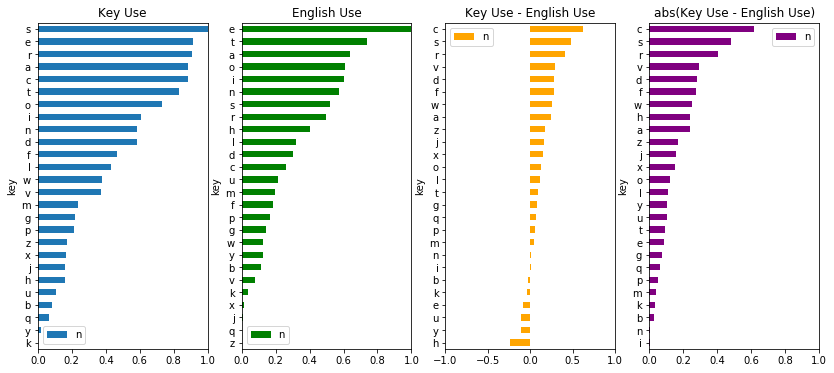

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ks_al = normalise(ks[ks.index.isin(alpha.index)]) # get only a-z keyscores
diff  = ks_al.sub(alpha)                          # get normalised abs diff between eng & keys.
d_abs = diff.abs()

sorted_plot(ks_al, ax=ax1, title="Key Use")
sorted_plot(alpha, ax=ax2, title="English Use",                color="green")
sorted_plot(diff,  ax=ax3, title="Key Use - English Use",      color="orange")
sorted_plot(d_abs, ax=ax4, title="abs(Key Use - English Use)", color="purple")
# plt.savefig("data/fig1.png")

Even though there is the odd caveat, the keys with the highest absolute difference generally seem to be short-cut keys. I did think this before, so it seems to validate the data as much as it did my hypothesis. Here is a annotation of the top 10 and keyboard short-cuts I can think of off the top of my head:

    1.  C    ⌘C       copy         (system wide)
             ctrl-C    interupt     (terminal)
    2.  S    ⌘S       save         (system wide)
             shift-⌘S save         (system wide)
    3.  R    ⌘R       refresh      (webrowsers)
             shift-⌘R hard-refresh (webrowsers)
    4.  V    ⌘V       paste        (system wide)
    5.  F    ⌘F       find         (system wide)    <- home key
    6.  W    ⌘W       window close (system wide)
    7.  A    ⌘A       select all   (system wide)
    8.  Z    ⌘Z       undo         (system wide)
    9.  J    ???       ? no idea                     <- home key
    10. X    ⌘X       cut          (system wide)

Only a few (9, 10) am I not convinced about. 

There are some differences in what is being typed as im not writing google books of course.

### Relation to programing langauges?

As the letter use is different to english by 17%(avg), another reason for this could be that the majority of what I type is not written like a book and insted in context free programing langauges. I thoight id get a sample from a large directory of python and c/cpp files on my computer to see how they might compare. 

Used this command to do so:

    grep [a-zA-Z0-9] -o . -hr \
    --exclude-dir={env,build,bin,dist} \
    --include=\*.{c,cc,cpp,h,py} \
    | sort -f | uniq -ic > out.txt
    
The eventual sample was smaller than I hoped but still a couple hundred files worth of alphanumeric character counts. I had to keep downsizing the search space because it was taking to long and I got bored. Anyway now we can load this and compare with the other samples.

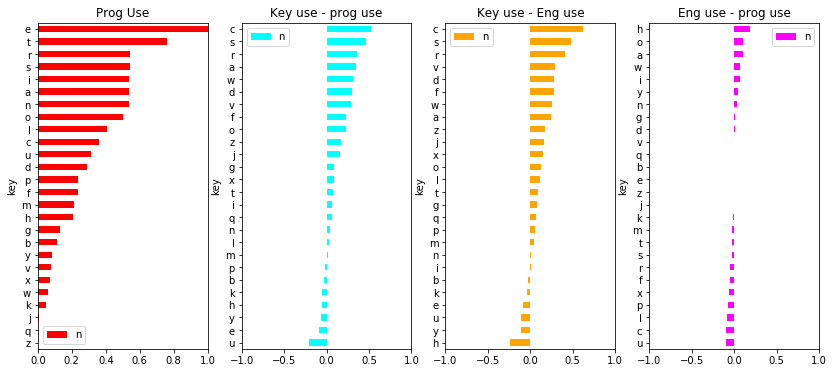

In [19]:
progs = pd.read_csv("data/prog_letters.csv").set_index("key")
proAZ = normalise(progs[progs.index.isin(alpha.index)])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ks_p_diff = ks_al.sub(proAZ)
al_p_diff = alpha.sub(proAZ)

sorted_plot(proAZ,     ax=ax1, title="Prog Use",           color="red")
sorted_plot(ks_p_diff, ax=ax2, title="Key use - prog use", color="cyan")
sorted_plot(diff,      ax=ax3, title="Key use - Eng use",  color="orange")
sorted_plot(al_p_diff, ax=ax4, title="Eng use - prog use", color="magenta")
# plt.savefig("data/fig2.png")

Looking at the graphs you can see that similar letter patterns reoccur comparing eng and prog to key use. These reoccurances seem to point to key shortcuts again. comparing english and progamming languages seems more balanced, maybe comments in source code even it out. Interestingly the `h` in key-eng seems to appear at the other end of the scale when comparisons are made in eng-prog.

In [14]:
print("""
Avg Abs Differences:
    Key-Eng  = %.4f
    Key-Prog = %.4f
    Eng-Prog = %.4f
""" % (d_abs.mean(), ks_p_diff.abs().mean(), al_p_diff.abs().mean()))


Avg Abs Differences:
    Key-Eng  = 0.1728
    Key-Prog = 0.1675
    Eng-Prog = 0.0474



## Summary

